In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# !pip install tensorflow

  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.15.0-cp312-cp312-win_amd64.whl.metadata (49 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   --------------------

In [6]:
df = pd.read_csv(r"C:\Users\HARSHITH\Downloads\pemfc_preprocessed_data.csv")
df.head()

,I,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode,V
0,-0.886787,-1.027522,-0.806638,-1.261444,-1.873236,-1.227992,-2.493136,-1.875273,491.114619
1,-0.886787,-1.027522,-0.806638,-1.261444,-1.872990,-1.227992,-2.493136,-1.875273,491.114619
2,-0.886787,-1.027522,-0.806638,-1.261444,-1.872671,-1.227991,-2.493136,-1.875273,491.114619
3,-0.886787,-1.027522,-0.806638,-1.261444,-1.870597,-1.227988,-2.493136,-1.875273,491.114619
4,-0.886787,-1.027522,-0.806638,-1.261444,-1.867493,-1.227981,-2.493136,-1.875273,491.114619


In [ ]:
features = ['I', 'T', 'Hydrogen', 'Oxygen', 'RH anode', 'Rh Cathode']
X = df[features].values
y = df['V'].values

# df[features].values

array([[-0.88678675, -1.26144425, -1.87323585, -1.22799172, -2.49313573,
        -1.87527334],
       [-0.88678675, -1.26144425, -1.87298979, -1.22799152, -2.49313573,
        -1.87527334],
       [-0.88678675, -1.26144425, -1.87267145, -1.22799118, -2.49313573,
        -1.87527334],
       ...,
       [ 2.21713293,  1.45879825,  2.33931411,  2.04881018, -0.24850894,
        -1.22485199],
       [ 2.21713293,  1.45879825,  2.33931411,  2.04881018, -0.24850894,
        -1.22485199],
       [ 2.21713293,  1.45879825,  2.33931411,  2.04881018, -0.24850894,
        -1.22485199]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

c:\Users\HARSHITH\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 178454.0938 - mae: 417.8127 - val_loss: 168493.3438 - val_mae: 405.7405
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169635.3281 - mae: 407.0034 - val_loss: 143257.4688 - val_mae: 373.5494
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131814.6250 - mae: 357.3660 - val_loss: 83026.8750 - val_mae: 279.8565
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65427.0078 - mae: 242.9828 - val_loss: 28638.4922 - val_mae: 141.0540
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24175.9688 - mae: 127.2193 - val_loss: 16822.8340 - val_mae: 101.9973
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14304.7725 - mae: 94.5221 - val_loss: 13658.4434 - val_mae: 88.6140
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12736.6934 - mae: 86.4566 - val_loss: 11361.3535 - val_mae: 76.4144
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10693.8086 - mae: 76.7002 - val_loss:

In [15]:
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
print(f"\nANN Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")



ANN Model Performance:
Mean Squared Error (MSE): 69.56
R² Score: 0.980


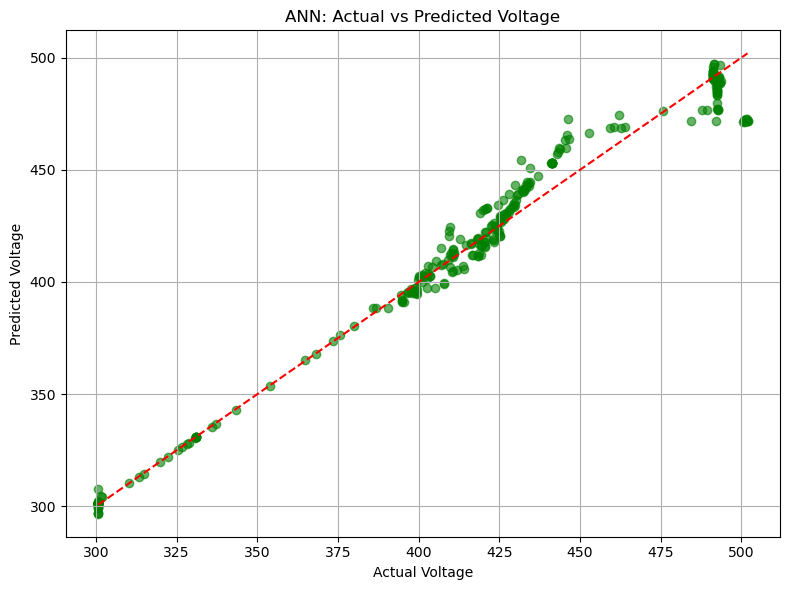

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Voltage')
plt.ylabel('Predicted Voltage')
plt.title('ANN: Actual vs Predicted Voltage')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
model.save("../models/ann_model.h5")
import joblib
joblib.dump(scaler, "../models/ann_scaler.pkl")

['../models/ann_scaler.pkl']